In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [2]:
file = 'Crime_09.csv'
crime_df = pd.DataFrame(pd.read_csv(file))
crime_df.head()

,X,Y,Address,City,State,Date,Hour,OffenseType,Beat,BlockRange,StreetName,Type
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12.0,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST
1,-95.478453,29.731622,5700 RICHMOND AVE,HOUSTON,TX,1984-08-26,1.0,Theft,18F30,5700-5799,RICHMOND,AVE
2,-95.299274,29.900101,12200 SWAN RIVER DR,HOUSTON,TX,2000-08-13,17.0,Theft,8C60,12200-12299,SWAN RIVER,DR
3,-95.351548,29.692139,6600 LONDON ST,HOUSTON,TX,2001-08-20,20.0,Theft,14D10,6600-6699,LONDON,ST
4,-95.492678,29.671037,5900 DUMFRIES DR,HOUSTON,TX,2002-01-01,8.0,Theft,15E10,5900-5999,DUMFRIES,DR


In [3]:
def sev(row):
    if row['OffenseType'] == 'Aggravated Assault':
        val = 1
    elif row['OffenseType'] == 'Rape':
        val = 1
    elif row['OffenseType'] == 'Murder':
        val = 1
    elif row['OffenseType'] == 'Robbery':
        val = 1
    elif row['OffenseType'] == 'Arson':
        val = 0
    elif row['OffenseType'] == 'Burglary':
        val = 0
    else:
        val = 0
    return val

In [4]:
crime_df['Severity'] = crime_df.apply(sev, axis=1)

In [5]:
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

In [6]:
crime_df['Year'] = crime_df['Date'].dt.year
crime_df['Month'] = crime_df['Date'].dt.month
crime_df['Day'] = crime_df['Date'].dt.day
crime_df['Weekday'] = crime_df['Date'].dt.dayofweek

In [7]:
crime_df.head()

,X,Y,Address,City,State,Date,Hour,OffenseType,Beat,BlockRange,StreetName,Type,Severity,Year,Month,Day,Weekday
0,-95.322341,29.801320,4500 WIPPRECHT ST,HOUSTON,TX,1980-05-01,12.0,Aggravated Assault,7C20,4500-4599,WIPPRECHT,ST,1,1980.0,5.0,1.0,3.0
1,-95.478453,29.731622,5700 RICHMOND AVE,HOUSTON,TX,1984-08-26,1.0,Theft,18F30,5700-5799,RICHMOND,AVE,0,1984.0,8.0,26.0,6.0
2,-95.299274,29.900101,12200 SWAN RIVER DR,HOUSTON,TX,2000-08-13,17.0,Theft,8C60,12200-12299,SWAN RIVER,DR,0,2000.0,8.0,13.0,6.0
3,-95.351548,29.692139,6600 LONDON ST,HOUSTON,TX,2001-08-20,20.0,Theft,14D10,6600-6699,LONDON,ST,0,2001.0,8.0,20.0,0.0
4,-95.492678,29.671037,5900 DUMFRIES DR,HOUSTON,TX,2002-01-01,8.0,Theft,15E10,5900-5999,DUMFRIES,DR,0,2002.0,1.0,1.0,1.0


In [37]:
crime_df.Beat.unique()

array(['7C20', '18F30', '8C60', '14D10', '15E10', '10H80', '19G10',
       '5F10', '2A50', '11H50', '10H60', '13D40', '6B30', '6B60', '20G50',
       '12D10', '7C30', '2A30', '19G20', '5F30', '7C50', '11H30', '14D20',
       '14D30', '16E20', '1A30', '12D30', '18F40', '17E30', '17E40',
       '14D40', '9C20', '24C30', '10H40', '11H10', '6B20', '20G10',
       '21I10', '18F20', '17E20', '1A20', '18F60', '18F50', '1A50',
       '10H20', '6B50', '2A60', '5F20', '3B10', '24C10', '13D20', '20G70',
       '8C10', '15E40', '4F20', '10H70', '20G20', '21I20', '20G60',
       '10H10', '19G40', '9C30', '3B40', '1A10', '20G30', '20G80',
       '16E30', '21I50', '4F30', '17E10', '8C30', '13D10', '11H20',
       '2A10', '7C40', '12D70', '16E40', '20G40', '12D20', '15E20',
       '19G50', '6B40', '7C10', '6B10', '12D50', '8C20', '8C40', '14D50',
       '10H50', '11H40', '3B30', '23J50', '12D60', '1A40', '2A40', '8C50',
       '9C40', '15E30', '10H30', '24C50', '19G30', '3B50', '5F40',
       '12D40',

In [46]:
weekday_df = pd.DataFrame(crime_df.groupby('Weekday')['Severity'].mean())
day_df = pd.DataFrame(crime_df.groupby('Day')['Severity'].mean())
month_df = pd.DataFrame(crime_df.groupby('Month')['Severity'].mean())
beat_df = pd.DataFrame(crime_df.groupby('Beat')['Severity'].mean())
hour_df = pd.DataFrame(crime_df.groupby('Hour')['Severity'].mean())

In [40]:
# Creat function to calculate max and min of crime severity
def whatevs(df):
    crime_max = df.Severity.max()
    crime_min = df.Severity.min()
    crime_rng = crime_max - crime_min
    crime_low = crime_min/crime_rng
    crime_high = (.5 - crime_max)/crime_rng
    crime_list = [crime_low, crime_high]
    return crime_list

In [41]:
L = whatevs(weekday_df)[0]
H = whatevs(weekday_df)[1]

weekday_df.style.background_gradient(cmap='RdYlGn_r',low=L, high=H)

,Severity
Weekday,
0.0,0.148325
1.0,0.14594
2.0,0.141856
3.0,0.143329
4.0,0.150247
5.0,0.191413
6.0,0.215421


In [47]:
L = whatevs(hour_df)[0]
H = whatevs(hour_df)[1]

hour_df.style.background_gradient(cmap='RdYlGn_r',low=L, high=H)

,Severity
Hour,
0.0,0.170107
1.0,0.311895
2.0,0.314947
3.0,0.29697
4.0,0.259733
5.0,0.221928
6.0,0.124204
7.0,0.0738401
8.0,0.0732934


In [42]:
L = whatevs(day_df)[0]
H = whatevs(day_df)[1]

day_df.style.background_gradient(cmap='RdYlGn_r',low=L, high=H)

,Severity
Day,
1.0,0.157169
2.0,0.157362
3.0,0.155457
4.0,0.172619
5.0,0.168599
6.0,0.169611
7.0,0.165822
8.0,0.163414
9.0,0.152554


In [101]:
L = whatevs(beat_df)[0]
H = whatevs(beat_df)[1]

# beat_df.style.background_gradient(cmap='RdYlGn_r',low=L, high=H)

In [44]:
L = whatevs(month_df)[0]
H = whatevs(month_df)[1]

month_df.style.background_gradient(cmap='RdYlGn_r',low=L, high=H)

,Severity
Month,
1.0,0.148986
2.0,0.147763
3.0,0.158228
4.0,0.153655
5.0,0.1629
6.0,0.169508
7.0,0.0591472
8.0,0.175549
9.0,0.179686


In [48]:
month = weekday_df.reset_index()

In [50]:
X = month.Weekday.values.reshape(-1, 1)
y = month.Severity.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (7, 1) (7, 1)


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.]])

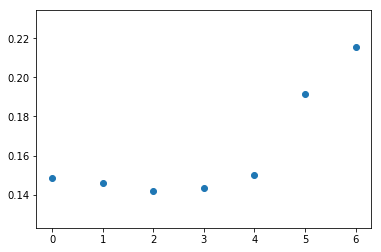

In [51]:
plt.scatter(X, y)


In [52]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [53]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.01073666]]
y-axis intercept:  [0.13015174]


In [65]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[6.]]


In [63]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

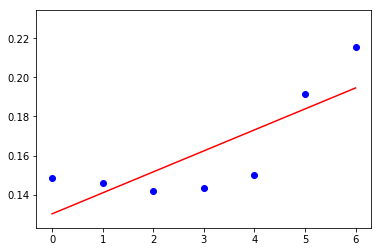

In [64]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [66]:
from sklearn import tree

In [79]:
crime_clean = crime_df.dropna()

In [80]:
target = crime_clean["Severity"]

In [102]:
data = crime_clean[["Hour","Month","Weekday"]]
feature_names = data.columns
print(feature_names)
data.head()

Index(['Hour', 'Month', 'Weekday'], dtype='object')


,Hour,Month,Weekday
0,12.0,5.0,3.0
1,1.0,8.0,6.0
2,17.0,8.0,6.0
3,20.0,8.0,0.0
4,8.0,1.0,1.0


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [104]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8381180223285486

In [105]:
X_test.head()

,Hour,Month,Weekday
56750,9.0,12.0,2.0
22797,15.0,9.0,4.0
60386,20.0,12.0,3.0
19863,4.0,9.0,5.0
50554,0.0,11.0,5.0


In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8376395534290271

In [107]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6187983222078351, 'Hour'),
 (0.2138608129477734, 'Month'),
 (0.16734086484439112, 'Weekday')]

In [108]:
rf.predict([[2,11,5]])

array([0])

In [100]:
prediction_list = []
for p in Row_list:
    value = rf.predict([p])
    prediction_list.append(value)
print(prediction_list)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), arr

In [110]:
Row_list =[] 
  
# Iterate over each row 
for index, rows in X_test.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Hour, rows.Month, rows.Weekday] 
      
    # append the list to the final list 
    Row_list.append(my_list)
print(Row_list)

[[9.0, 12.0, 2.0], [15.0, 9.0, 4.0], [20.0, 12.0, 3.0], [4.0, 9.0, 5.0], [0.0, 11.0, 5.0], [20.0, 6.0, 2.0], [23.0, 12.0, 1.0], [14.0, 3.0, 4.0], [18.0, 12.0, 1.0], [0.0, 6.0, 2.0], [23.0, 4.0, 6.0], [11.0, 3.0, 5.0], [23.0, 2.0, 1.0], [2.0, 8.0, 6.0], [20.0, 9.0, 4.0], [20.0, 6.0, 1.0], [19.0, 12.0, 3.0], [18.0, 5.0, 0.0], [2.0, 3.0, 5.0], [7.0, 5.0, 0.0], [20.0, 12.0, 5.0], [10.0, 3.0, 0.0], [21.0, 3.0, 5.0], [14.0, 4.0, 6.0], [22.0, 9.0, 1.0], [20.0, 5.0, 5.0], [19.0, 12.0, 3.0], [21.0, 12.0, 3.0], [12.0, 4.0, 1.0], [0.0, 11.0, 2.0], [9.0, 11.0, 4.0], [22.0, 12.0, 1.0], [6.0, 6.0, 0.0], [23.0, 11.0, 4.0], [8.0, 12.0, 3.0], [21.0, 9.0, 5.0], [12.0, 8.0, 6.0], [21.0, 12.0, 3.0], [21.0, 3.0, 3.0], [17.0, 1.0, 0.0], [8.0, 11.0, 5.0], [3.0, 8.0, 2.0], [15.0, 11.0, 4.0], [10.0, 9.0, 0.0], [14.0, 8.0, 1.0], [16.0, 6.0, 2.0], [14.0, 10.0, 4.0], [20.0, 11.0, 2.0], [11.0, 1.0, 1.0], [22.0, 5.0, 1.0], [2.0, 12.0, 4.0], [7.0, 9.0, 0.0], [18.0, 4.0, 3.0], [13.0, 8.0, 6.0], [20.0, 8.0, 6.0], [19.